## Objectives:

 * Understand what python objects are
 * Understand that *everything* in python is an object
 * Appreciate when/how object-oriented programming might be useful

This notebook revists the Tahoe data analysis from the beginning of the course using an object-oriented approach.  The basic idea will be to create a base class that represents a timeseries and to use that class for both the Tahoe and the NCDC data.

First though, we'll do an introduction to classes/objects.

# An intro to classes

As we have seen, class definitions in Python have a basic format:

```python

class myNewClass:

    # define static class variables
    a = 1

    def a_function(self):
        """ do something interesting """
        print(self.a)
   
```

In this format, `myNewClass` is the name of a new object type (like `list`, `int`, `float`, `string`, etc.) that has a predefined set of *attributes* and *methods*.  In this example, we have a variable `a` and an object method (a function) `a_function`.

In [1]:
class myNewClass:

    # define static class variables
    a = 1

    def a_function(self):
        """ print the class variable 'a' """
        print(self.a)

In [2]:
""" Test out the new class """
# define a new 'instance' of the myNewClass object
test1 = myNewClass()

# run the object's only method (it prints the value of 'a')
test1.a_function()

# now let's create a new object and let's modify the object variable 'a'
test2 = myNewClass()
test2.a = 'Hello Class!'
# and run the print function again
test2.a_function()

# run the original to show that it's 'a' variable is unchanged
test1.a_function()

1
Hello Class!
1


Note how each 'instance' of `myNewClass` has it's own separate set of defined variables.

Classes in Python have a feature called 'inheritance': a new class can be based on an old class, and it inherits everything within it.

The syntax is slightly different (note the use of `myNewClass` in parentheses; that sets the class from which the object inherits variables and methods.  Also note the use of the weirdly-named '__init__()' function: this function gets called when the class is created (see how the value of '2' is passed in below).

In [3]:
class myNewDerivedClass(myNewClass):
    
    def __init__(self,b):
        """initialze the class; set the value of b"""
        
        # save the value of b into the object
        self.b = b
    
    def another_function(self):
        """ print the class variables 'a' and 'b' """
        print(self.a,self.b)
        
# create an instance of the new class, initialize 'b' with the value 2
test3 = myNewDerivedClass(2)

# run the function that we defined; it should print "1 2"
test3.another_function()

# run the 'a_function()', which was inherited
test3.a_function()

1 2
1


Now that we have a basic grasp of the concept of objects and inheritance, let's apply this to a real-world example.

# Using classes for the Tahoe data

In [4]:
""" initialize the notebook """
%matplotlib inline
import netCDF4 as nc # load the netCDF library
import pylab as PP # load the plotting library
import matplotlib as mpl # import matplotlib
import datetime as dt # import the datetime libarary for date handling
import scipy.stats # get the stats library
from numpy import * # load numpy
import calendar

#Set the default font for plots
font = { 'family' : 'sans-serif', \
         'size' : '15', \
         'weight' : 'bold'}
mpl.rc('axes', labelweight = 'bold') # needed for bold axis labels in more recent version of matplotlib
mpl.rc('font', **font)

In [5]:
""" define a class to represent a timeseries """

class TimeSeries:
    
    # the __init__ function is a special function that gets 
    def __init__(self,fileName):
        """ Initialize the timeseries from a file """
        
        # use the function's read method to read from a file
        self.readFromFile(fileName)
        
    # define a default readFromFile() routine (this can be overriden in a derived class)
    def readFromFile(self,fileName):
        """ Read from a file using numpy's loadtxt routine.
        
        
            input:
            ------
                a path to a file that is readable by numpy.loadtxt
        
        """
        
        # load the data from the CSV
        data = loadtxt(fileName,skiprows=5,delimiter=',')
        
        # save the data in the class
        self.data = data[:,1]
        
        # save the times in the class
        self.dates = data[:,0]
        
    def dates_as_datetimes(self):
        """Converts timeseries dates into datetime object'

            output:
            -------

            time_val : a datetime representation of the date.
        """

        times = []
        for i in range(self.data.shape[0]):
            yyyymm = self.dates[i]

            # convert the date to a string
            string_value = str(int(yyyymm))

            # extract the year
            year = int(string_value[:4])

            # extract the month
            month = int(string_value[4:6])

            # get the last day of this month
            # note the use of '_' in the following line.  Recall that this is a variable that can be used
            # to throw away unwanted return values.
            _,day = calendar.monthrange(year,month)

            # convert this to a datetime object
            time_val = dt.datetime(year,month,day)

             # add it to the list
            times.append(time_val)

        return times
    

    def plot(self):
        """Plots the timeseries"""
        fig,ax = PP.subplots(figsize=(10,8))
        
        ax.plot(self.dates_as_datetimes(),self.data,'-')
        
        PP.show()

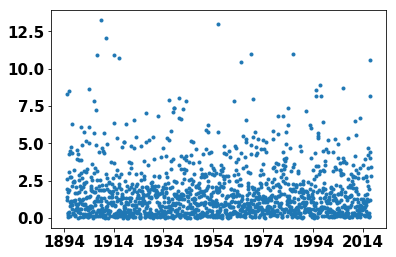

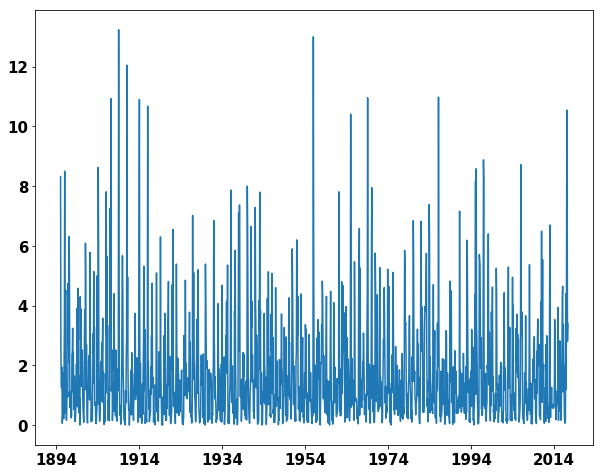

In [6]:
# load the precip data
# you can download this from https://bitbucket.org/taobrienucd/taobrienucd.bitbucket.org/raw/master/data/precip_division3_1895-2017.csv
precip_timeseries = TimeSeries('../data/precip_division3_1895-2017.csv')

# plot manually
PP.plot(precip_timeseries.dates_as_datetimes(),precip_timeseries.data,'.')
PP.show()

# plot using the object's method
precip_timeseries.plot()

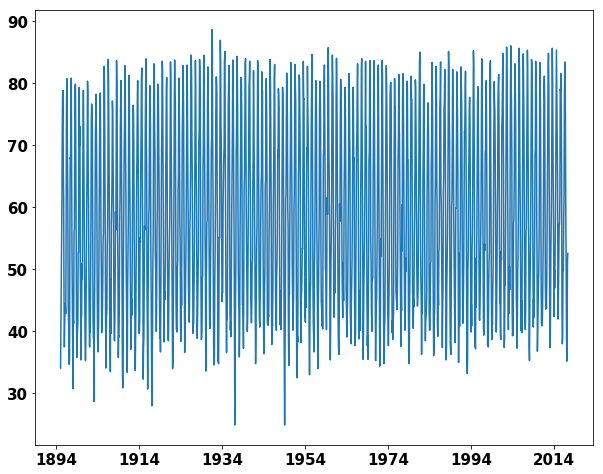

In [7]:
# load the temperature data
# you can download this from https://bitbucket.org/taobrienucd/taobrienucd.bitbucket.org/raw/master/data/tmax_division3_1895-2017.csv
tmax_timeseries = TimeSeries('../data/tmax_division3_1895-2017.csv')

# plot using the object's method
tmax_timeseries.plot()

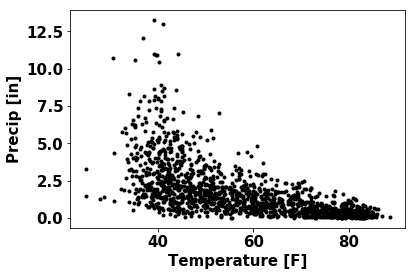

In [8]:
""" plot precip vs tmax """

PP.plot(tmax_timeseries.data,precip_timeseries.data,'k.')
PP.xlabel('Temperature [F]')
PP.ylabel('Precip [in]')
PP.show()